This algorithm simply goes through all possible weights and test them to find the best one

In [108]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [109]:
# dot product of the state and the weights to get an action
def get_action(s, w):
    if np.dot(s, w) > 0:
        return 1
    else:
        return 0
    

In [110]:
# Run an episode
def play_one_episode(env, params):
    
    observation = env.reset()
    t = 0
    for t in range(10000):
        action = get_action(observation, params)
        observation, reward, done, info = env.step(action)
        if done:
            break
        
    return t


In [111]:
# Call play_one_episode repeatedly to find out the average time length
def play_multiple_episodes(env, T, params):
    
    sum_t = 0
    
    for i in range(T):
        sum_t = sum_t + play_one_episode(env, params)
    
    avg_t = sum_t/T
    
    return avg_t


In [112]:
# randomly searching for the best weights to get the highest time length
def random_search(env):
    
    T = 100 #play 100 episodes for each random weights array
    all_t = np.empty([100, 1])
    best_t = 0
    best_params = np.empty([1, 4])
    
    for i in range(100):
        w = np.random.sample([4, 1]) * 2 - 1 # between -1 and 1
        avg_t = play_multiple_episodes(env, T, w)
        all_t[i] = avg_t
        if avg_t > best_t:
            best_t = avg_t
            best_params = w
            
    return all_t, best_params

[2017-10-06 05:41:17,430] Making new env: CartPole-v0


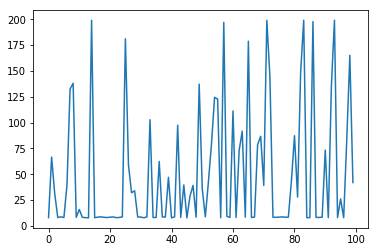

***Final run with final weights***


199.0

In [113]:
    env = gym.make('CartPole-v0')
    episode_lengths, params = random_search(env)
    plt.plot(episode_lengths)
    plt.show()

    # play a final set of episodes
    print("***Final run with final weights***")
    play_multiple_episodes(env, 100, params)